In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
print(x_train.shape)
# изменене размера до 32x32 и получение цвета от 0 до 1 
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
# добавление еще одной размерности для LeNet 
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

# деление данных на train и validation
val_proc = 12
x_val = x_train[:int(len(y_train) * val_proc / 100),:,:,:]
y_val = y_train[:int(len(y_train) * val_proc / 100)]
x_train = x_train[int(len(y_train) * val_proc / 100):,:,:,:]
y_train = y_train[int(len(y_train) * val_proc / 100):]

# количественная проверка входных данных
print(len(y_val))
n = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(y_val)):
    n[y_val[i]] += 1
for i in range(10):
    n[i] = round(n[i] / len(y_val) * 100, 3) 
print(n)

print(len(y_train))
n = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(y_train)):
    n[y_train[i]] += 1
for i in range(10):
    n[i] = round(n[i] / len(y_train) * 100, 3) 
print(n)

(60000, 28, 28)
7200
[9.903, 11.236, 9.639, 10.208, 10.194, 8.736, 10.069, 10.694, 9.347, 9.972]
52800
[9.867, 11.237, 9.97, 10.22, 9.674, 9.076, 9.835, 10.407, 9.807, 9.907]


In [3]:
# задание batch_size и epoch 
bs = 256
ep = 10

In [4]:
# задание LeNet модели
modelNet = models.Sequential()
modelNet.add(layers.Conv2D(6, 5, activation='tanh', input_shape=(32, 32, 1)))
modelNet.add(layers.MaxPooling2D(pool_size=2, strides=2))
modelNet.add(layers.Conv2D(16, 5, activation='tanh'))
modelNet.add(layers.MaxPooling2D(pool_size=2, strides=2))
modelNet.add(layers.Conv2D(120, 5, activation='tanh'))
modelNet.add(layers.Flatten())
modelNet.add(layers.Dense(84, activation='tanh'))
modelNet.add(layers.Dense(10, activation='softmax'))
# вывод модели
modelNet.summary()

modelNet.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [5]:
# обучение LeNet
historyNet = modelNet.fit(x_train, y_train, batch_size=bs, epochs=ep, validation_data=(x_val, y_val))
# запуск на тестовых данных
modelNet.evaluate(x_test, y_test)

Epoch 1/10
207/207 [==============================] - 4s 8ms/step - loss: 0.3851 - accuracy: 0.8939 - val_loss: 0.1153 - val_accuracy: 0.9675
Epoch 2/10
207/207 [==============================] - 1s 7ms/step - loss: 0.0937 - accuracy: 0.9720 - val_loss: 0.0746 - val_accuracy: 0.9796
Epoch 3/10
207/207 [==============================] - 1s 7ms/step - loss: 0.0637 - accuracy: 0.9799 - val_loss: 0.0704 - val_accuracy: 0.9801
Epoch 4/10
207/207 [==============================] - 1s 7ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0624 - val_accuracy: 0.9821
Epoch 5/10
207/207 [==============================] - 1s 7ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0518 - val_accuracy: 0.9844
Epoch 6/10
207/207 [==============================] - 1s 7ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0473 - val_accuracy: 0.9872
Epoch 7/10
207/207 [==============================] - 1s 7ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0455 - val_accuracy: 0.9862
Epoch 

[0.032094184309244156, 0.9890000224113464]

In [6]:
# задание LSTM модели 
modelLSTM = models.Sequential()
modelLSTM.add(layers.LSTM(units=64, input_shape=(32, 32)))
modelLSTM.add(layers.Dense(units=10, activation='softmax'))
# вывод модели
modelLSTM.summary()

modelLSTM.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 25,482
Trainable params: 25,482
Non-trainable params: 0
_________________________________________________________________


In [7]:
# пришлось убрать размерность для LSTM
x_train = tf.squeeze(x_train)
x_val = tf.squeeze(x_val)
# обучение LSTM модели
historyLSTM = modelLSTM.fit(x_train, y_train, batch_size=bs, epochs=ep, validation_data=(x_val, y_val))
# пришлось убрать размерность для LSTM
x_test = tf.squeeze(x_test)
# запуск на тестовых данных
modelLSTM.evaluate(x_test, y_test)


Epoch 1/10
207/207 [==============================] - 3s 9ms/step - loss: 1.0654 - accuracy: 0.6455 - val_loss: 0.4377 - val_accuracy: 0.8678
Epoch 2/10
207/207 [==============================] - 2s 8ms/step - loss: 0.3319 - accuracy: 0.9005 - val_loss: 0.2381 - val_accuracy: 0.9324
Epoch 3/10
207/207 [==============================] - 2s 8ms/step - loss: 0.2181 - accuracy: 0.9354 - val_loss: 0.1950 - val_accuracy: 0.9424
Epoch 4/10
207/207 [==============================] - 2s 8ms/step - loss: 0.1717 - accuracy: 0.9488 - val_loss: 0.1637 - val_accuracy: 0.9524
Epoch 5/10
207/207 [==============================] - 2s 8ms/step - loss: 0.1414 - accuracy: 0.9575 - val_loss: 0.1230 - val_accuracy: 0.9649
Epoch 6/10
207/207 [==============================] - 2s 8ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.1201 - val_accuracy: 0.9663
Epoch 7/10
207/207 [==============================] - 2s 8ms/step - loss: 0.1017 - accuracy: 0.9698 - val_loss: 0.1147 - val_accuracy: 0.9657
Epoch 

[0.07449619472026825, 0.9772999882698059]

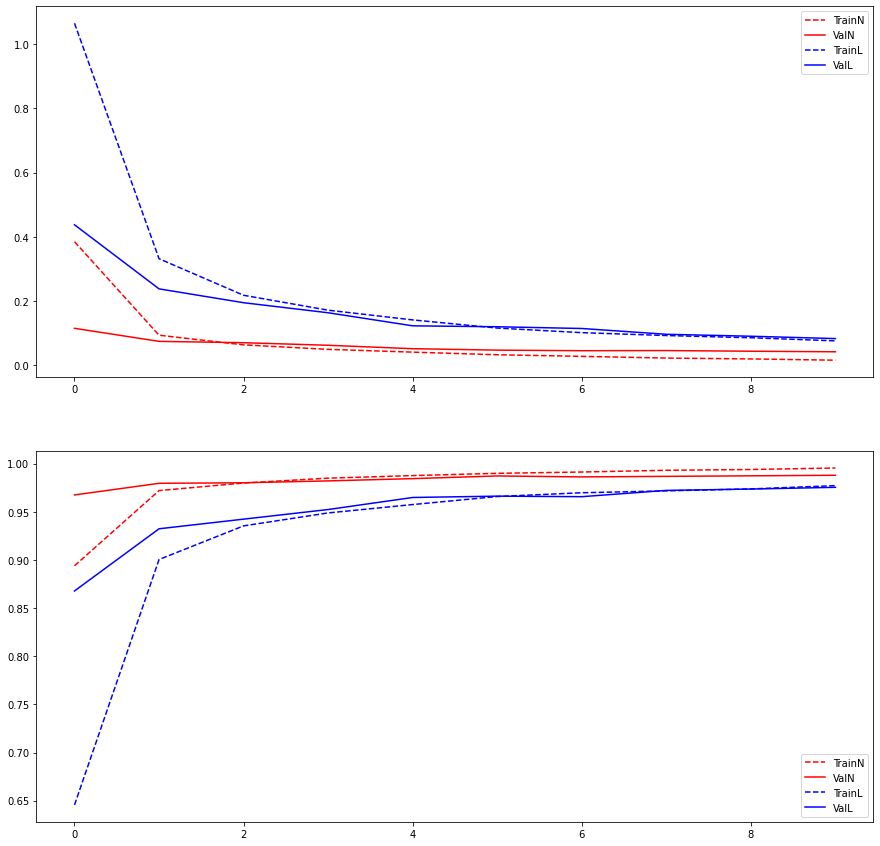

In [8]:
# вывод графиков обучения на экран
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(historyNet.history['loss'], 'r--')
axs[0].plot(historyNet.history['val_loss'], 'r-')
axs[0].plot(historyLSTM.history['loss'], 'b--')
axs[0].plot(historyLSTM.history['val_loss'], 'b-')
axs[0].legend(['TrainN', 'ValN', 'TrainL', 'ValL'])

axs[1].plot(historyNet.history['accuracy'], 'r--')
axs[1].plot(historyNet.history['val_accuracy'], 'r-')
axs[1].plot(historyLSTM.history['accuracy'], 'b--')
axs[1].plot(historyLSTM.history['val_accuracy'], 'b-')
axs[1].legend(['TrainN', 'ValN','TrainL', 'ValL'])